In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
#read data into df
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


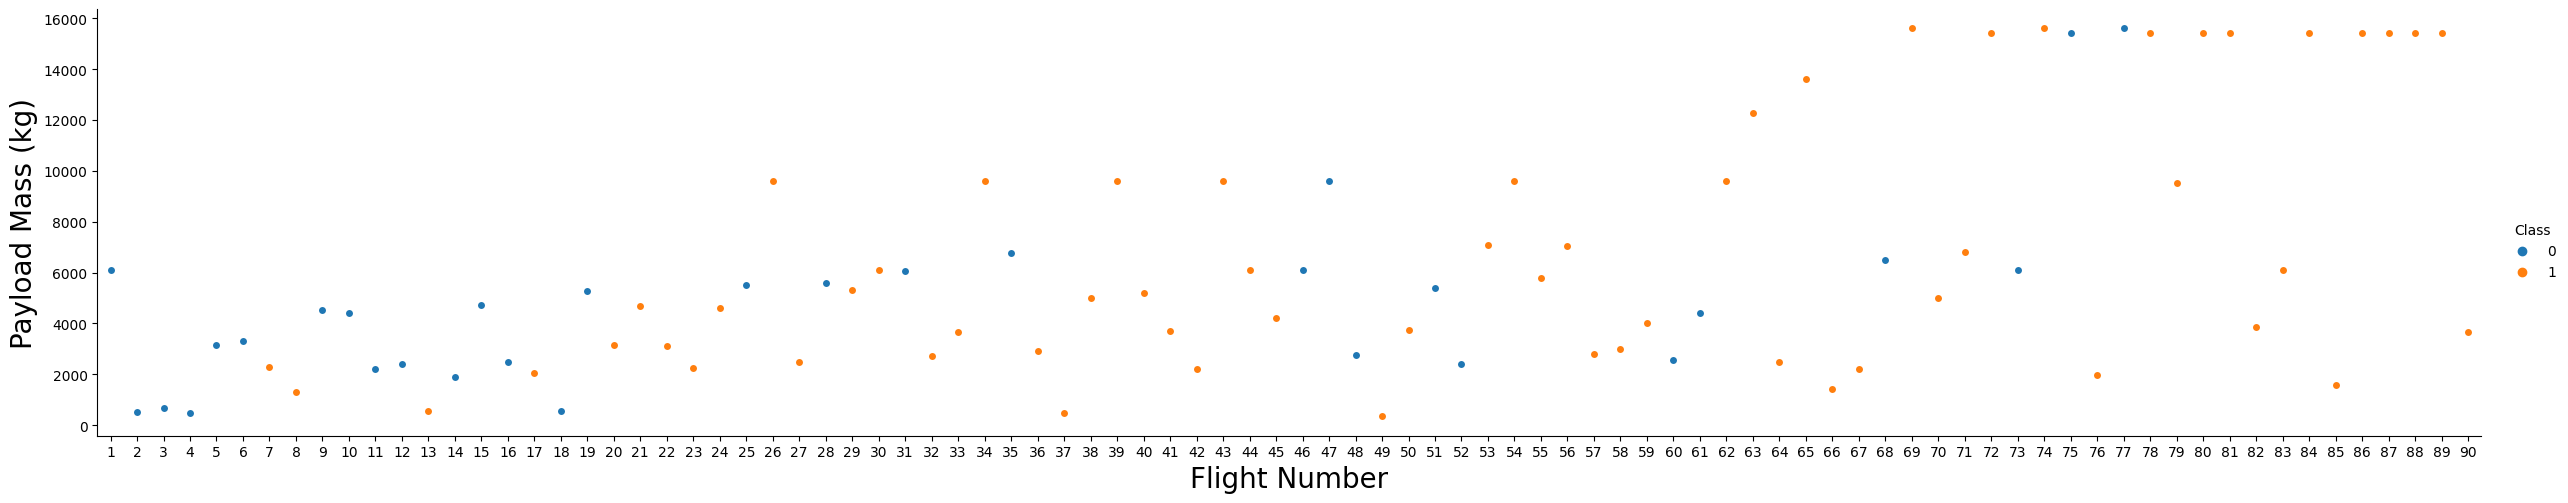

In [36]:
#plotting and comparing variables
sns.catplot(y = "PayloadMass", x = "FlightNumber", hue = "Class", data = df, aspect = 5)
plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Payload Mass (kg)", fontsize = 20)
plt.show()


/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


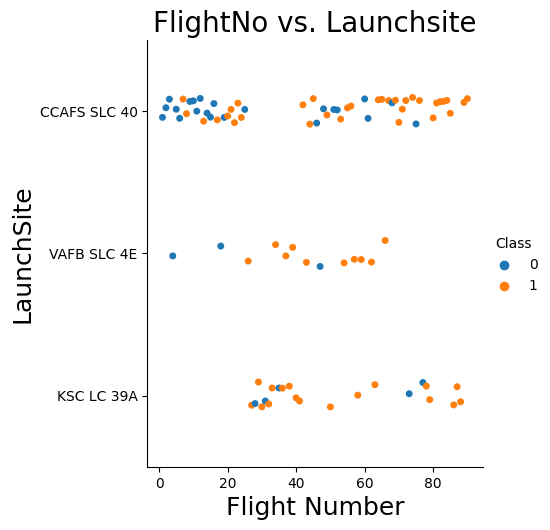

In [37]:
#Visualizing the relationship between flight number and launch site
sns.catplot(y = "LaunchSite", x = "FlightNumber", hue = "Class", data = df)
plt.title("FlightNo vs. Launchsite", fontsize = 20)
plt.xlabel("Flight Number", fontsize = 18)
plt.ylabel("LaunchSite", fontsize = 18)
plt.show()

/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


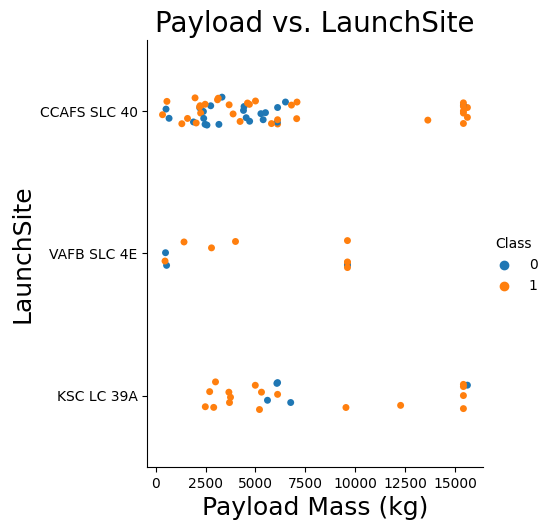

In [39]:
sns.catplot(y = "LaunchSite", x = "PayloadMass", data =df, hue = "Class")
plt.title("Payload vs. LaunchSite", fontsize = 20)
plt.xlabel("Payload Mass (kg)", fontsize = 18)
plt.ylabel("LaunchSite", fontsize = 18)
plt.show()

In [76]:
orbit_avg = df.groupby("Orbit")["Class"].mean().reset_index()
orbit_avg.head

<bound method NDFrame.head of     Orbit     Class
0   ES-L1  1.000000
1     GEO  1.000000
2     GTO  0.518519
3     HEO  1.000000
4     ISS  0.619048
5     LEO  0.714286
6     MEO  0.666667
7      PO  0.666667
8      SO  0.000000
9     SSO  1.000000
10   VLEO  0.857143>

In [77]:
orbit_df = pd.DataFrame(orbit_avg)
orbit_df.head()

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048


In [78]:
orbit_df.columns

Index(['Orbit', 'Class'], dtype='object')

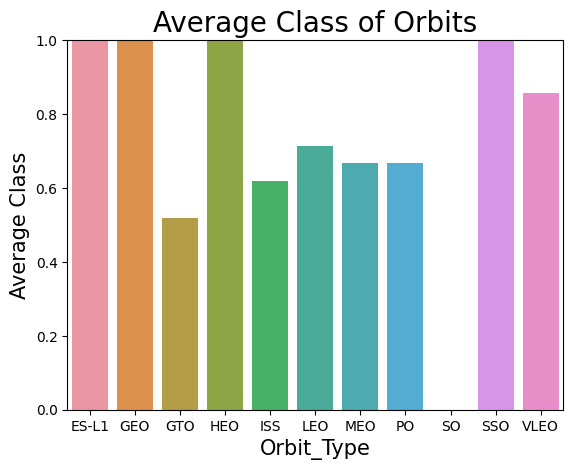

In [85]:
sns.barplot(x = "Orbit", y = "Class", data = orbit_df)
plt.title("Average Class of Orbits", fontsize = 20)
plt.xlabel("Orbit_Type", fontsize = 15)
plt.ylabel("Average Class", fontsize = 15)
plt.ylim([0,1])
plt.show()


/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


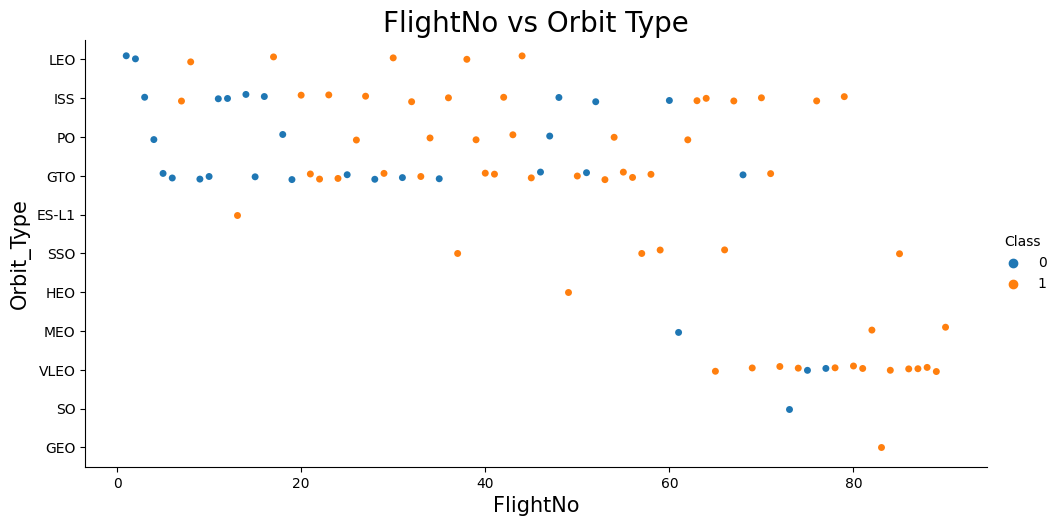

In [90]:
sns.catplot(x = "FlightNumber", y = "Orbit", data = df, hue = "Class", aspect = 2)
plt.title("FlightNo vs Orbit Type", fontsize = 20)
plt.xlabel("FlightNo", fontsize = 15)
plt.ylabel("Orbit_Type", fontsize = 15)
plt.show()


/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Payload vs Orbit')

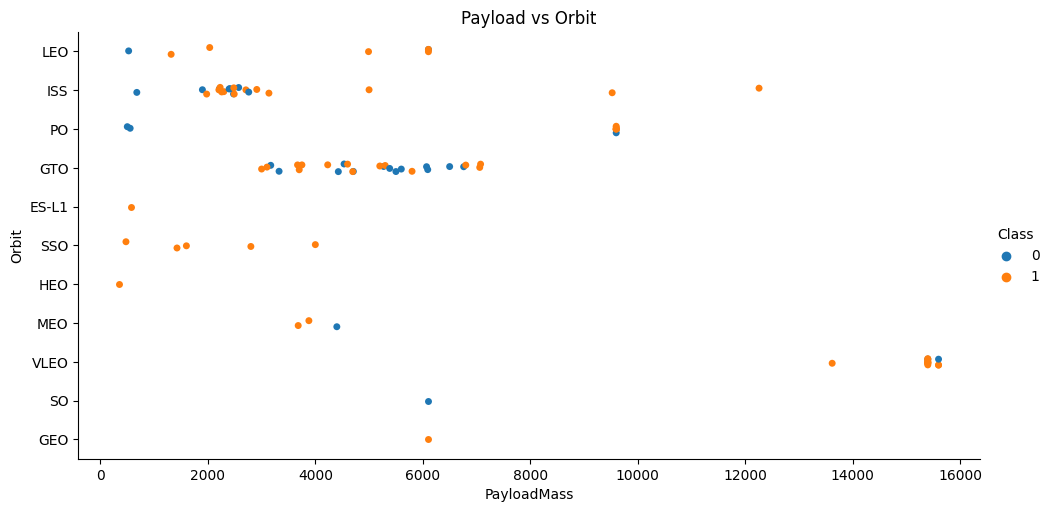

In [92]:
sns.catplot(x = "PayloadMass", y = "Orbit", data = df, hue = "Class", aspect = 2)
plt.title("Payload vs Orbit")


In [94]:
year = []
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df["Date"] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [100]:
year_avg = df.groupby("Date")["Class"].mean().reset_index()
year_avg.tail()

,Date,Class
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


<Axes: xlabel='Date', ylabel='Class'>

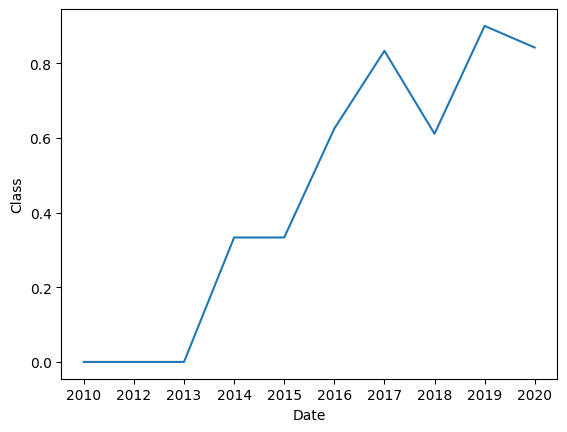

In [101]:
sns.lineplot(x = "Date", y = "Class", data = year_avg)

In [117]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', "LandingPad", 'Block', "ReusedCount", 'Serial']]
features.shape

(90, 12)

In [119]:
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']])
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [113]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
features_one_hot.to_csv('dataset_part_3.csv', index = False)